# 16_2.Chi-square test(독립성)(연습문제)
- https://www.statsmodels.org/devel/contingency_tables.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
postch_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/16_2.ncaa.csv', encoding="cp949")
postch_df.head()

,steroid,division,count
0,1,1,103
1,1,2,52
2,1,3,65
3,2,1,8440
4,2,2,4289


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [5]:
postch_df['steroid'].replace({1:'Yes', 2:'No'}, inplace=True)
postch_df['division'].replace({1:'division1', 2:'division2', 3:'division3'}, inplace=True)
postch_df['steroid'] = postch_df['steroid'].astype('category')
postch_df['division'] = postch_df['division'].astype('category')
postch_df

,steroid,division,count
0,Yes,division1,103
1,Yes,division2,52
2,Yes,division3,65
3,No,division1,8440
4,No,division2,4289
5,No,division3,6428


### 2.3 자료구조 살펴보기

In [6]:
postch_df.shape

(6, 3)

In [7]:
postch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   steroid   6 non-null      category
 1   division  6 non-null      category
 2   count     6 non-null      int64   
dtypes: category(2), int64(1)
memory usage: 444.0 bytes


In [8]:
postch_df.columns

Index(['steroid', 'division', 'count'], dtype='object')

## 3.Chi-square test(독립성)

### 3.1 분할표(contingency table)

In [10]:
tab = pd.crosstab(postch_df['steroid'],
                  postch_df['division'],
                  values = postch_df['count'],
                  aggfunc = 'sum')

In [12]:
# 위치 조정
tab = tab.loc[["Yes", "No"], :]
tab = tab.loc[:, ["division1", "division2", "division3"]]
tab

division,division1,division2,division3
steroid,,,
Yes,103,52,65
No,8440,4289,6428


### 3.2 교차분석

In [13]:
# ch분석
result = sm.stats.Table(tab)

In [14]:
# observed
print(result.table_orig)

division  division1  division2  division3
steroid                                  
Yes             103         52         65
No             8440       4289       6428


In [15]:
# expected
print(result.fittedvalues)

division    division1    division2    division3
steroid                                        
Yes         96.994375    49.286267    73.719358
No        8446.005625  4291.713733  6419.280642


In [16]:
# Pearson
rslt = result.test_nominal_association()
print(rslt.pvalue)

0.4560268089882771


### 3.3 표준화잔차

In [17]:
# 표준화 잔차
result.standardized_resids

division,division1,division2,division3
steroid,,,
Yes,0.820188,0.441327,-1.252539
No,-0.820188,-0.441327,1.252539


### 3.4 odds ratio

In [18]:
tab = tab.loc[:, ["division1", "division3"]]
tab

division,division1,division3
steroid,,
Yes,103,65
No,8440,6428


In [19]:
table = np.asarray(tab)
table

array([[ 103,   65],
       [8440, 6428]])

In [20]:
t22 = sm.stats.Table2x2(table)

In [21]:
print(t22.summary())

               Estimate   SE   LCB    UCB  p-value
--------------------------------------------------
Odds ratio        1.207        0.883 1.649   0.238
Log odds ratio    0.188 0.159 -0.124 0.500   0.238
Risk ratio        1.080        0.957 1.219   0.212
Log risk ratio    0.077 0.062 -0.044 0.198   0.212
--------------------------------------------------


## 4.그래프

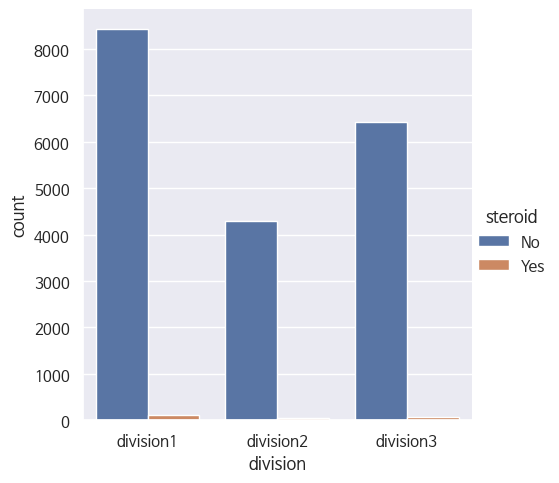

In [23]:
sns.catplot(x = "division",
            y = "count",
            hue = "steroid",
            kind = "bar",
            data = postch_df)
plt.show()